# PyTorch for CIFAR10
We test ResNet classifier.
First init some basic environment.

In [1]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

# mobilenetV2 classifier

In [2]:
import torch.optim as optim
import torch.nn as nn
import time
from cifar10_solver import CIFAR10Solver, plot_history, count_parameters
from classifiers.mobilenet import MobileNetV2

model = MobileNetV2(num_classes=10)
print(model)
num_params = count_parameters(model)
print('params num:', num_params)

MobileNetV2(
  (layers): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace)
    )
    (1): InvertedResidualBlock(
      (block): Sequential(
        (0): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU6(inplace)
        (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
        (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReLU6(inplace)
        (6): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (7): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidualBlock(
      (block): Sequential(
        (0):

# train 

In [3]:
%%time
opt = optim.SGD(model.parameters(), lr=1e-1, momentum=0.9, weight_decay=1e-4, nesterov=True)
loss_fn = nn.CrossEntropyLoss()
solver = CIFAR10Solver(model, opt, loss_fn)
# lr_scheduler = optim.lr_scheduler.ReduceLROnPlateau(opt, 'min', factor=0.5)
# lr_scheduler = optim.lr_scheduler.ReduceLROnPlateau(opt, 'min', factor=0.5)
# lr_scheduler = optim.lr_scheduler.StepLR(opt, step_size=50, gamma=0.1)
lr_scheduler = optim.lr_scheduler.ReduceLROnPlateau(opt, 'min', factor=0.5)
# lr_scheduler = None
history = solver.train(epochs=150, lr_scheduler=lr_scheduler, train_batch_size=128)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
train on device: cuda:0
start training. epoch steps: 352
Epoch: 1/150, lr:1.00e-01
[##################################################] 100.00% loss:1.6 acc:39.70% val_loss:1.5 val_acc:48.62%
Epoch: 2/150, lr:1.00e-01
[##################################################] 100.00% loss:1.2 acc:56.90% val_loss:1.8 val_acc:44.14%
Epoch: 3/150, lr:1.00e-01
[##################################################] 100.00% loss:0.98 acc:65.12% val_loss:1.2 val_acc:60.68%
Epoch: 4/150, lr:1.00e-01
[##################################################] 100.00% loss:0.83 acc:70.89% val_loss:0.9 val_acc:69.02%
Epoch: 5/150, lr:1.00e-01
[##################################################] 100.00% loss:0.72 acc:74.83% val_loss:0.72 val_acc:75.50%
Epoch: 6/150, lr:1.00e-01
[##################################################] 100.00% loss:0.65 acc:77.12% val_loss:0.76 val_acc:75.20%
Epoch: 7/150,

[##################################################] 100.00% loss:0.25 acc:91.46% val_loss:0.37 val_acc:88.26%
Epoch: 60/150, lr:1.00e-01
[##################################################] 100.00% loss:0.25 acc:91.13% val_loss:0.34 val_acc:88.78%
Epoch: 61/150, lr:1.00e-01
[##################################################] 100.00% loss:0.25 acc:91.23% val_loss:0.33 val_acc:89.78%
Epoch: 62/150, lr:5.00e-02
[##################################################] 100.00% loss:0.16 acc:94.21% val_loss:0.28 val_acc:91.20%
Epoch: 63/150, lr:5.00e-02
[##################################################] 100.00% loss:0.14 acc:95.02% val_loss:0.3 val_acc:91.12%
Epoch: 64/150, lr:5.00e-02
[##################################################] 100.00% loss:0.14 acc:95.31% val_loss:0.29 val_acc:91.22%
Epoch: 65/150, lr:5.00e-02
[##################################################] 100.00% loss:0.13 acc:95.47% val_loss:0.3 val_acc:91.66%
Epoch: 66/150, lr:5.00e-02
[###################################

[##################################################] 100.00% loss:0.0051 acc:99.89% val_loss:0.31 val_acc:93.84%
Epoch: 119/150, lr:3.13e-03
[##################################################] 100.00% loss:0.0044 acc:99.90% val_loss:0.31 val_acc:93.92%
Epoch: 120/150, lr:3.13e-03
[##################################################] 100.00% loss:0.0045 acc:99.89% val_loss:0.3 val_acc:93.96%
Epoch: 121/150, lr:3.13e-03
[##################################################] 100.00% loss:0.004 acc:99.92% val_loss:0.31 val_acc:94.12%
Epoch: 122/150, lr:3.13e-03
[##################################################] 100.00% loss:0.0046 acc:99.88% val_loss:0.3 val_acc:94.14%
Epoch: 123/150, lr:3.13e-03
[##################################################] 100.00% loss:0.0042 acc:99.92% val_loss:0.3 val_acc:93.92%
Epoch: 124/150, lr:3.13e-03
[##################################################] 100.00% loss:0.0036 acc:99.94% val_loss:0.31 val_acc:93.94%
Epoch: 125/150, lr:3.13e-03
[################

# plot loss history
We check the classifier by plotting the loss and acc.

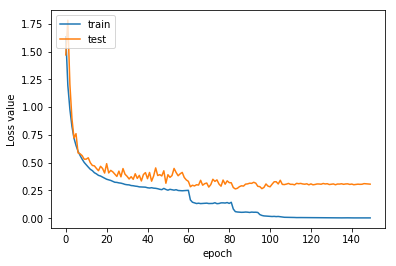

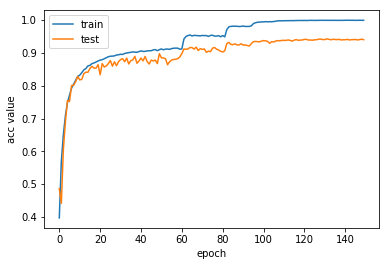

In [4]:
plot_history(history)

# test classifier
test on test data

In [5]:
test_loss, test_acc = solver.test(test_batch_size=128)
print('test_loss:{:.2} test_acc:{:.2%}'.format(test_loss, test_acc))

test_loss:0.31 test_acc:93.47%
